<a href="https://colab.research.google.com/github/Giffy/Agenda-JAVA/blob/master/5_CNN_GPU_Keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network 

Using vehicle density in city, predict if there is a bad weather condition

## Download dataset and inflate

In [42]:
!pip install wget
import wget
url = 'https://raw.githubusercontent.com/Giffy/Mobile_footprint_AIBCN/master/dataset/weather.tar.gz'
try:
  filename = wget.download(url)
  print ( 'Dataset downloaded successfully.')

  # Extract tar file
  import tarfile
  tf = tarfile.open( filename )
  tf.extractall()  
    
except:
  print ( 'Error downloading dataset.')

Dataset downloaded successfully.


In [43]:
url = 'https://raw.githubusercontent.com/Giffy/Mobile_footprint_AIBCN/master/dataset/images.tar.gz'
try:
  filename = wget.download(url)
  print ( 'Dataset downloaded successfully.')

  # Extract tar file
  import tarfile
  tf = tarfile.open( filename )
  tf.extractall()  
    
except:
  print ( 'Error downloading dataset.')

Dataset downloaded successfully.


In [0]:
PATH_DATASET_IMAGES = 'Images'
DATASET_WEATHER = 'weather.csv'

##  Load libraries

In [0]:
# Load numpy to do array operations
import numpy as np
# Load matplotlib
import matplotlib.pyplot as plt
# Load os
import os
# Load opencv  
import cv2       # install opencv if requires :  !pip install opencv-python
# Load pandas
import pandas as pd

## Images overview

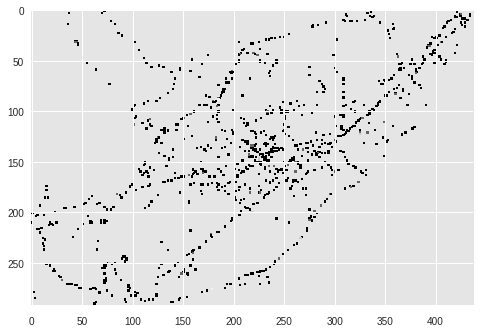

Filename: 2016_3_16_1.png
Image size : (296, 438)


In [46]:
for img in os.listdir(path):             # listdir; list all filenames in path
  img_array = cv2.imread(os.path.join(PATH_DATASET_IMAGES, img), cv2.IMREAD_GRAYSCALE)
  plt.imshow(img_array, cmap="gray")
  plt.show()
  break
print ("Filename: " + img)
print ("Image size : " + str(img_array.shape))

In [0]:
df = pd.DataFrame()
df_weather = pd.read_csv('weather.csv')
df_weather = df_weather.set_index('data')

In [0]:
fd_even = [0,2,4,6,8,10,12,14,16,18,20,22,24]
fd_odd  = [1,3,5,7,9,11,13,15,17,19,21,23]
am      = [5,6,7,8,9,10]
pm      = [16,17,18,19,20,21]

timing = []
timing.append(fd_even)
timing.append(fd_odd)
timing.append(am)
timing.append(pm)

In [0]:
IMG_SIZE = 280

for i in range(len(timing)):
  for img in os.listdir(path):             # listdir; list all filenames in path

    try:
      # Read images
      image_name = img.split('_')
      if int(image_name[3].split('.')[0]) == i+1 :
        year = image_name[0]
        month = image_name[1]
        month = '0'+str(month) if len(str(month)) == 1 else str(month) 
        day = image_name[2]
        day = '0'+str(day) if len(str(day)) == 1 else str(day) 
        period = image_name[3].split('.')[0]
        img_array = cv2.imread(os.path.join(PATH_DATASET_IMAGES, img), cv2.IMREAD_GRAYSCALE)
        img_array= cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))         # Resize to 280x280

        # Read weather history
        date= int(year+month+day)
        df_temp= df_weather[(df_weather['hour'].isin(timing[0]))] 
        df_rain = df_temp.loc[ date , ['hour', 'period', 'rain']]
        label = df_rain.rain.max()

        # Adding image and weather history to dataset
        data = {
          'data' : [ year+month+day ],
          'period' : [ period ],
          'img' : [ img_array ],
          'label' : [ label ]
        }
        df = df.append(pd.DataFrame(data), ignore_index=True)
    except:
      pass

In [50]:
print( 'Number of images loaded : ' + str( len(df) ) )

Number of images loaded : 2848


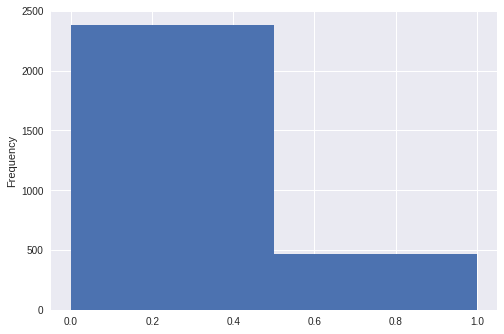

In [51]:
# plot dataset classes
df.label.plot.hist(bins = 2)


In [52]:
len_rain = len( df[ df.label == 1] )
len_sun  = len( df[ df.label == 0] )

print ('Images with Raining days : ' + str( len_rain ))
print ('Images with Sunny days : '   + str( len_sun ))

Images with Raining days : 468
Images with Sunny days : 2380


## Create a balanced dataset

In [14]:
df.head()

,data,img,label,period
0,20160316,"[[234, 234, 234, 234, 234, 234, 234, 234, 234,...",1,1
1,20170202,"[[234, 234, 234, 234, 234, 234, 234, 234, 234,...",0,1
2,20161103,"[[234, 234, 234, 234, 234, 234, 234, 234, 234,...",0,1
3,20160930,"[[234, 234, 234, 234, 234, 234, 234, 234, 234,...",0,1
4,20171218,"[[234, 234, 234, 234, 234, 234, 234, 234, 234,...",0,1


In [0]:
# Set classification / Labels as index
df.set_index('label', inplace= True)

In [0]:
sunny = df.loc[0]
rain = df.loc[1]

In [17]:
sunny.head(3)

,data,img,period
label,,,
0,20170202,"[[234, 234, 234, 234, 234, 234, 234, 234, 234,...",1
0,20161103,"[[234, 234, 234, 234, 234, 234, 234, 234, 234,...",1
0,20160930,"[[234, 234, 234, 234, 234, 234, 234, 234, 234,...",1


In [0]:
frac = len_rain/len_sun
sunny2 = sunny.sample(frac = frac ).reset_index()       # Shuffle data
len_sunny = len( sunny2)

In [19]:
sunny2.head(3)

,label,data,img,period
0,0,20161230,"[[234, 234, 234, 234, 234, 234, 234, 234, 234,...",3
1,0,20151210,"[[234, 234, 234, 234, 234, 234, 234, 234, 234,...",1
2,0,20160901,"[[234, 234, 234, 234, 234, 234, 234, 234, 234,...",1


In [0]:
rain = rain.reset_index()
dataset = rain
dataset = dataset.append(sunny2)

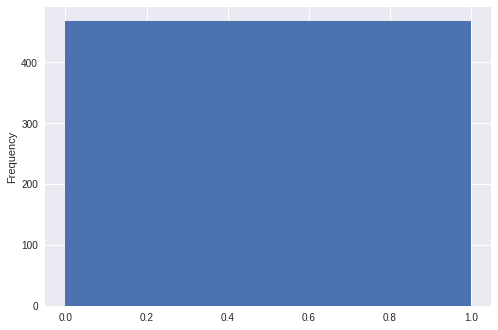

In [21]:
dataset = dataset.sample(frac = 1 ).reset_index(drop= True)       # Shuffle data
dataset.label.plot.hist(bins = 2)                                 # Prints dataset distribution

In [22]:
# Set classification / Labels as index

print ('Raining days : ' + str( len(rain )))
print ('Sunny days : '   + str( len(sunny2 )))

Raining days : 468
Sunny days : 468


## Create training data

In [0]:
X = []
Y = []

X.append(dataset.img[:])
Y.append(dataset.label[:])
  
  
IMG_LAYERS = 1     # image layers could be 1 for grayscale images or 3 to color RGB images
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, IMG_LAYERS )


In [24]:
# Check if GPU is available
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found, to activate the GPU go to menu "Runtime" and submenu "Change runtime type", then change hardware accelerator from None to GPU.')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# X pixels normalization 
X = X/255.0

model = Sequential()

## Input layer
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))   # adds 64 units with 3x3 window size
model.add(Activation("relu"))   # Activatior layer = relu (rectified linear regresion)
model.add(MaxPooling2D(pool_size=(2,2)))

## First hidden layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))   # Activatior layer = relu (rectified linear regresion)
model.add(MaxPooling2D(pool_size=(2,2)))

## Output layer
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))

#Activation
model.add(Activation('sigmoid'))

#model.compile(loss='categorical')
model.compile(loss='binary_crossentropy', # will deliver 0 or 1
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
batch_size = 50
epochs = 10
validation_split = 0.1


In [0]:
# Fit model on training data
history = model.fit(X , Y
              , batch_size = batch_size
              , epochs = epochs
              , validation_split = validation_split
              , verbose = 1                    
             )

## Saving model

In [0]:
model.save('model')

## Connect to Goggle Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
